In [1]:
from pkg.utils.utils_python3 import *
from pkg.data_collecting.load_data import *
import random
import shutil
import os

DATA_PATH = "./data"
CONVERTED_PATH = "./data/converted"
SCENE_FILENAME = "scene.pkl"
JOINT_NUM = 13
gtimer = GlobalTimer()
# ## Load Global params
DATASET_LIST = sorted(os.listdir(CONVERTED_PATH))
trainset_num = None
if trainset_num is not None:
    TRAINSET_LIST =  DATASET_LIST[:trainset_num]
    TESTSET_LIST = DATASET_LIST[trainset_num:]
else:
    TRAINSET_LIST = ['20201214-165211', '20201216-021416', '20201218-024611']
    TESTSET_LIST = ['20201208-121454', '20201212-232318', '20201213-061207']
    #TRAINSET_LIST = ['20201221-020250']
    #TESTSET_LIST = ['20201220-222433']
    
# trainset
data_loader = DataLoader(JOINT_NUM)
train_set = data_loader.get_dataset_args(TRAINSET_LIST, JOINT_NUM)
N_train = len(train_set)
test_set = data_loader.get_dataset_args(TESTSET_LIST, JOINT_NUM)
N_test = len(test_set)
print(f'Train/Test: {N_train}, {N_test}')

Train/Test: 59522, 19215


In [2]:
import tensorflow as tf
    
@tf.function
def test_step(images, labels):
    # training=False is only needed if there are layers with different
    # behavior during training versus inference (e.g. Dropout).
    predictions = model(images, training=False)
    t_loss = loss_object(labels, predictions)

    test_loss(t_loss)
    test_accuracy(labels, predictions)

In [3]:
MODEL_NAME = "20210108-202908/model_23"
logpath = os.path.join('logs','gradient_tape',MODEL_NAME)
model = tf.keras.models.load_model(logpath)

In [4]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

optimizer = tf.keras.optimizers.Adam()

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

In [5]:
BATCH_SIZE = 100
LOG_STEP = 100

In [6]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [7]:
test_accuracy.reset_states()


i_step = 0
scene_batch, success_batch = [], []
for scene_tuple in test_set:
    scene_data, success, skey = load_scene_data(*scene_tuple)
    i_step += 1
    scene_batch.append(scene_data)
    success_batch.append(success)
    if i_step%BATCH_SIZE==0:
        cbox, cbox_m, ccyl, ccyl_m, ibox, ibox_m, gbox, gbox_m = data_loader.separate_dat(np.array(scene_batch, dtype=np.float32))
        test_step([cbox, cbox_m, ccyl, ccyl_m, ibox, ibox_m, gbox, gbox_m], np.array(success_batch,dtype=np.int))
        scene_batch, success_batch = [], []
    if i_step%LOG_STEP==0:
        print("test step - {}/{}        ".format(i_step, N_test), end = '\r')
if i_step%BATCH_SIZE!=0 and len(scene_batch)>0:
    cbox, cbox_m, ccyl, ccyl_m, ibox, ibox_m, gbox, gbox_m = data_loader.separate_dat(np.array(scene_batch, dtype=np.float32))
    test_step([cbox, cbox_m, ccyl, ccyl_m, ibox, ibox_m, gbox, gbox_m], np.array(success_batch,dtype=np.int))


print(f'Full Accuracy ({i_step}): {test_accuracy.result() * 100}')

Full Accuracy (19215): 76.21128845214844


## All cases

In [6]:
test_accuracy.reset_states()


i_step = 0
scene_batch, success_batch = [], []
for scene_tuple in test_set:
    scene_data, success, skey = load_scene_data(*scene_tuple)
    i_step += 1
    scene_batch.append(scene_data)
    success_batch.append(success)
    if i_step%BATCH_SIZE==0:
        cbox, cbox_m, ccyl, ccyl_m, ibox, ibox_m, gbox, gbox_m = data_loader.separate_dat(np.array(scene_batch, dtype=np.float32))
        test_step([cbox, cbox_m, ccyl, ccyl_m, ibox, ibox_m, gbox, gbox_m], np.array(success_batch,dtype=np.int))
        scene_batch, success_batch = [], []
    if i_step%LOG_STEP==0:
        print("test step - {}/{}        ".format(i_step, N_test), end = '\r')
if i_step%BATCH_SIZE!=0 and len(scene_batch)>0:
    cbox, cbox_m, ccyl, ccyl_m, ibox, ibox_m, gbox, gbox_m = data_loader.separate_dat(np.array(scene_batch, dtype=np.float32))
    test_step([cbox, cbox_m, ccyl, ccyl_m, ibox, ibox_m, gbox, gbox_m], np.array(success_batch,dtype=np.int))


print(f'Full Accuracy ({i_step}): {test_accuracy.result() * 100}')


test_accuracy.reset_states()


i_step = 0
scene_batch, success_batch = [], []
for scene_tuple in test_set:
    scene_data, success, skey = load_scene_data(*scene_tuple)
    if success:
        i_step += 1
        scene_batch.append(scene_data)
        success_batch.append(success)
        if i_step%BATCH_SIZE==0:
            cbox, cbox_m, ccyl, ccyl_m, ibox, ibox_m, gbox, gbox_m = data_loader.separate_dat(np.array(scene_batch, dtype=np.float32))
            test_step([cbox, cbox_m, ccyl, ccyl_m, ibox, ibox_m, gbox, gbox_m], np.array(success_batch,dtype=np.int))
            scene_batch, success_batch = [], []
        if i_step%LOG_STEP==0:
            print("test step - {}/{}        ".format(i_step, N_test), end = '\r')
if i_step%BATCH_SIZE!=0 and len(scene_batch)>0:
    cbox, cbox_m, ccyl, ccyl_m, ibox, ibox_m, gbox, gbox_m = data_loader.separate_dat(np.array(scene_batch, dtype=np.float32))
    test_step([cbox, cbox_m, ccyl, ccyl_m, ibox, ibox_m, gbox, gbox_m], np.array(success_batch,dtype=np.int))


print(f'Success Accuracy ({i_step}): {test_accuracy.result() * 100}')


test_accuracy.reset_states()


i_step = 0
scene_batch, success_batch = [], []
for scene_tuple in test_set:
    scene_data, success, skey = load_scene_data(*scene_tuple)
    if not success:
        i_step += 1
        scene_batch.append(scene_data)
        success_batch.append(success)
        if i_step%BATCH_SIZE==0:
            cbox, cbox_m, ccyl, ccyl_m, ibox, ibox_m, gbox, gbox_m = data_loader.separate_dat(np.array(scene_batch, dtype=np.float32))
            test_step([cbox, cbox_m, ccyl, ccyl_m, ibox, ibox_m, gbox, gbox_m], np.array(success_batch,dtype=np.int))
            scene_batch, success_batch = [], []
        if i_step%LOG_STEP==0:
            print("test step - {}/{}        ".format(i_step, N_test), end = '\r')
if i_step%BATCH_SIZE!=0 and len(scene_batch)>0:
    cbox, cbox_m, ccyl, ccyl_m, ibox, ibox_m, gbox, gbox_m = data_loader.separate_dat(np.array(scene_batch, dtype=np.float32))
    test_step([cbox, cbox_m, ccyl, ccyl_m, ibox, ibox_m, gbox, gbox_m], np.array(success_batch,dtype=np.int))


print(f'Failure Accuracy ({i_step}): {test_accuracy.result() * 100}')

Full Accuracy (19215): 76.21128845214844
Success Accuracy (6600): 53.939395904541016
Failure Accuracy (12615): 87.86365509033203


In [25]:
def get_action_type(CONVERTED_PATH, DATASET, WORLD, SCENE, ACTION, joint_num):
    ACTION_FILE = "-".join(ACTION.split("-")[:2])+".json"
    idx_act = int(ACTION.split("-")[-1].split(".")[0])
    action_data_dict = load_json(os.path.join(DATA_PATH, DATASET, WORLD, SCENE, ACTION_FILE))
    if action_data_dict[str(idx_act)]['rname1'] and action_data_dict[str(idx_act)]['rname2']:
        atype = "handover"
    elif action_data_dict[str(idx_act)]['obj1']['collision']:
        atype = "place"
    elif action_data_dict[str(idx_act)]['obj2']['collision']:
        atype = "pick"
    else:
        raise(RuntimeError("Unexpected case"))
    return atype

## Pick cases

In [26]:
action_target = "pick"

test_accuracy.reset_states()


i_step = 0
scene_batch, success_batch = [], []
for scene_tuple in test_set:
    scene_data, success, skey = load_scene_data(*scene_tuple)
    if get_action_type(*scene_tuple)==action_target:
        i_step += 1
        scene_batch.append(scene_data)
        success_batch.append(success)
        if i_step%BATCH_SIZE==0:
            cbox, cbox_m, ccyl, ccyl_m, ibox, ibox_m, gbox, gbox_m = data_loader.separate_dat(np.array(scene_batch, dtype=np.float32))
            test_step([cbox, cbox_m, ccyl, ccyl_m, ibox, ibox_m, gbox, gbox_m], np.array(success_batch,dtype=np.int))
            scene_batch, success_batch = [], []
        if i_step%LOG_STEP==0:
            print("test step - {}/{}        ".format(i_step, N_test), end = '\r')
if i_step%BATCH_SIZE!=0 and len(scene_batch)>0:
    cbox, cbox_m, ccyl, ccyl_m, ibox, ibox_m, gbox, gbox_m = data_loader.separate_dat(np.array(scene_batch, dtype=np.float32))
    test_step([cbox, cbox_m, ccyl, ccyl_m, ibox, ibox_m, gbox, gbox_m], np.array(success_batch,dtype=np.int))


print(f'Full Accuracy ({i_step}): {test_accuracy.result() * 100}')


test_accuracy.reset_states()


i_step = 0
scene_batch, success_batch = [], []
for scene_tuple in test_set:
    scene_data, success, skey = load_scene_data(*scene_tuple)
    if success and get_action_type(*scene_tuple)==action_target:
        i_step += 1
        scene_batch.append(scene_data)
        success_batch.append(success)
        if i_step%BATCH_SIZE==0:
            cbox, cbox_m, ccyl, ccyl_m, ibox, ibox_m, gbox, gbox_m = data_loader.separate_dat(np.array(scene_batch, dtype=np.float32))
            test_step([cbox, cbox_m, ccyl, ccyl_m, ibox, ibox_m, gbox, gbox_m], np.array(success_batch,dtype=np.int))
            scene_batch, success_batch = [], []
        if i_step%LOG_STEP==0:
            print("test step - {}/{}        ".format(i_step, N_test), end = '\r')
if i_step%BATCH_SIZE!=0 and len(scene_batch)>0:
    cbox, cbox_m, ccyl, ccyl_m, ibox, ibox_m, gbox, gbox_m = data_loader.separate_dat(np.array(scene_batch, dtype=np.float32))
    test_step([cbox, cbox_m, ccyl, ccyl_m, ibox, ibox_m, gbox, gbox_m], np.array(success_batch,dtype=np.int))


print(f'Success Accuracy ({i_step}): {test_accuracy.result() * 100}')


test_accuracy.reset_states()


i_step = 0
scene_batch, success_batch = [], []
for scene_tuple in test_set:
    scene_data, success, skey = load_scene_data(*scene_tuple)
    if not success and get_action_type(*scene_tuple)==action_target:
        i_step += 1
        scene_batch.append(scene_data)
        success_batch.append(success)
        if i_step%BATCH_SIZE==0:
            cbox, cbox_m, ccyl, ccyl_m, ibox, ibox_m, gbox, gbox_m = data_loader.separate_dat(np.array(scene_batch, dtype=np.float32))
            test_step([cbox, cbox_m, ccyl, ccyl_m, ibox, ibox_m, gbox, gbox_m], np.array(success_batch,dtype=np.int))
            scene_batch, success_batch = [], []
        if i_step%LOG_STEP==0:
            print("test step - {}/{}        ".format(i_step, N_test), end = '\r')
if i_step%BATCH_SIZE!=0 and len(scene_batch)>0:
    cbox, cbox_m, ccyl, ccyl_m, ibox, ibox_m, gbox, gbox_m = data_loader.separate_dat(np.array(scene_batch, dtype=np.float32))
    test_step([cbox, cbox_m, ccyl, ccyl_m, ibox, ibox_m, gbox, gbox_m], np.array(success_batch,dtype=np.int))


print(f'Failure Accuracy ({i_step}): {test_accuracy.result() * 100}')

Full Accuracy (5459): 85.7666244506836
Success Accuracy (1794): 78.42809295654297
Failure Accuracy (3665): 89.35880279541016


## Place cases

In [27]:
action_target = "place"

test_accuracy.reset_states()


i_step = 0
scene_batch, success_batch = [], []
for scene_tuple in test_set:
    scene_data, success, skey = load_scene_data(*scene_tuple)
    if get_action_type(*scene_tuple)==action_target:
        i_step += 1
        scene_batch.append(scene_data)
        success_batch.append(success)
        if i_step%BATCH_SIZE==0:
            cbox, cbox_m, ccyl, ccyl_m, ibox, ibox_m, gbox, gbox_m = data_loader.separate_dat(np.array(scene_batch, dtype=np.float32))
            test_step([cbox, cbox_m, ccyl, ccyl_m, ibox, ibox_m, gbox, gbox_m], np.array(success_batch,dtype=np.int))
            scene_batch, success_batch = [], []
        if i_step%LOG_STEP==0:
            print("test step - {}/{}        ".format(i_step, N_test), end = '\r')
if i_step%BATCH_SIZE!=0 and len(scene_batch)>0:
    cbox, cbox_m, ccyl, ccyl_m, ibox, ibox_m, gbox, gbox_m = data_loader.separate_dat(np.array(scene_batch, dtype=np.float32))
    test_step([cbox, cbox_m, ccyl, ccyl_m, ibox, ibox_m, gbox, gbox_m], np.array(success_batch,dtype=np.int))


print(f'Full Accuracy ({i_step}): {test_accuracy.result() * 100}')


test_accuracy.reset_states()


i_step = 0
scene_batch, success_batch = [], []
for scene_tuple in test_set:
    scene_data, success, skey = load_scene_data(*scene_tuple)
    if success and get_action_type(*scene_tuple)==action_target:
        i_step += 1
        scene_batch.append(scene_data)
        success_batch.append(success)
        if i_step%BATCH_SIZE==0:
            cbox, cbox_m, ccyl, ccyl_m, ibox, ibox_m, gbox, gbox_m = data_loader.separate_dat(np.array(scene_batch, dtype=np.float32))
            test_step([cbox, cbox_m, ccyl, ccyl_m, ibox, ibox_m, gbox, gbox_m], np.array(success_batch,dtype=np.int))
            scene_batch, success_batch = [], []
        if i_step%LOG_STEP==0:
            print("test step - {}/{}        ".format(i_step, N_test), end = '\r')
if i_step%BATCH_SIZE!=0 and len(scene_batch)>0:
    cbox, cbox_m, ccyl, ccyl_m, ibox, ibox_m, gbox, gbox_m = data_loader.separate_dat(np.array(scene_batch, dtype=np.float32))
    test_step([cbox, cbox_m, ccyl, ccyl_m, ibox, ibox_m, gbox, gbox_m], np.array(success_batch,dtype=np.int))


print(f'Success Accuracy ({i_step}): {test_accuracy.result() * 100}')


test_accuracy.reset_states()


i_step = 0
scene_batch, success_batch = [], []
for scene_tuple in test_set:
    scene_data, success, skey = load_scene_data(*scene_tuple)
    if not success and get_action_type(*scene_tuple)==action_target:
        i_step += 1
        scene_batch.append(scene_data)
        success_batch.append(success)
        if i_step%BATCH_SIZE==0:
            cbox, cbox_m, ccyl, ccyl_m, ibox, ibox_m, gbox, gbox_m = data_loader.separate_dat(np.array(scene_batch, dtype=np.float32))
            test_step([cbox, cbox_m, ccyl, ccyl_m, ibox, ibox_m, gbox, gbox_m], np.array(success_batch,dtype=np.int))
            scene_batch, success_batch = [], []
        if i_step%LOG_STEP==0:
            print("test step - {}/{}        ".format(i_step, N_test), end = '\r')
if i_step%BATCH_SIZE!=0 and len(scene_batch)>0:
    cbox, cbox_m, ccyl, ccyl_m, ibox, ibox_m, gbox, gbox_m = data_loader.separate_dat(np.array(scene_batch, dtype=np.float32))
    test_step([cbox, cbox_m, ccyl, ccyl_m, ibox, ibox_m, gbox, gbox_m], np.array(success_batch,dtype=np.int))


print(f'Failure Accuracy ({i_step}): {test_accuracy.result() * 100}')

Full Accuracy (4754): 82.68826293945312
Success Accuracy (1466): 70.8049087524414
Failure Accuracy (3288): 87.98661804199219


## handover cases

In [28]:
action_target = "handover"

test_accuracy.reset_states()


i_step = 0
scene_batch, success_batch = [], []
for scene_tuple in test_set:
    scene_data, success, skey = load_scene_data(*scene_tuple)
    if get_action_type(*scene_tuple)==action_target:
        i_step += 1
        scene_batch.append(scene_data)
        success_batch.append(success)
        if i_step%BATCH_SIZE==0:
            cbox, cbox_m, ccyl, ccyl_m, ibox, ibox_m, gbox, gbox_m = data_loader.separate_dat(np.array(scene_batch, dtype=np.float32))
            test_step([cbox, cbox_m, ccyl, ccyl_m, ibox, ibox_m, gbox, gbox_m], np.array(success_batch,dtype=np.int))
            scene_batch, success_batch = [], []
        if i_step%LOG_STEP==0:
            print("test step - {}/{}        ".format(i_step, N_test), end = '\r')
if i_step%BATCH_SIZE!=0 and len(scene_batch)>0:
    cbox, cbox_m, ccyl, ccyl_m, ibox, ibox_m, gbox, gbox_m = data_loader.separate_dat(np.array(scene_batch, dtype=np.float32))
    test_step([cbox, cbox_m, ccyl, ccyl_m, ibox, ibox_m, gbox, gbox_m], np.array(success_batch,dtype=np.int))


print(f'Full Accuracy ({i_step}): {test_accuracy.result() * 100}')


test_accuracy.reset_states()


i_step = 0
scene_batch, success_batch = [], []
for scene_tuple in test_set:
    scene_data, success, skey = load_scene_data(*scene_tuple)
    if success and get_action_type(*scene_tuple)==action_target:
        i_step += 1
        scene_batch.append(scene_data)
        success_batch.append(success)
        if i_step%BATCH_SIZE==0:
            cbox, cbox_m, ccyl, ccyl_m, ibox, ibox_m, gbox, gbox_m = data_loader.separate_dat(np.array(scene_batch, dtype=np.float32))
            test_step([cbox, cbox_m, ccyl, ccyl_m, ibox, ibox_m, gbox, gbox_m], np.array(success_batch,dtype=np.int))
            scene_batch, success_batch = [], []
        if i_step%LOG_STEP==0:
            print("test step - {}/{}        ".format(i_step, N_test), end = '\r')
if i_step%BATCH_SIZE!=0 and len(scene_batch)>0:
    cbox, cbox_m, ccyl, ccyl_m, ibox, ibox_m, gbox, gbox_m = data_loader.separate_dat(np.array(scene_batch, dtype=np.float32))
    test_step([cbox, cbox_m, ccyl, ccyl_m, ibox, ibox_m, gbox, gbox_m], np.array(success_batch,dtype=np.int))


print(f'Success Accuracy ({i_step}): {test_accuracy.result() * 100}')


test_accuracy.reset_states()


i_step = 0
scene_batch, success_batch = [], []
for scene_tuple in test_set:
    scene_data, success, skey = load_scene_data(*scene_tuple)
    if not success and get_action_type(*scene_tuple)==action_target:
        i_step += 1
        scene_batch.append(scene_data)
        success_batch.append(success)
        if i_step%BATCH_SIZE==0:
            cbox, cbox_m, ccyl, ccyl_m, ibox, ibox_m, gbox, gbox_m = data_loader.separate_dat(np.array(scene_batch, dtype=np.float32))
            test_step([cbox, cbox_m, ccyl, ccyl_m, ibox, ibox_m, gbox, gbox_m], np.array(success_batch,dtype=np.int))
            scene_batch, success_batch = [], []
        if i_step%LOG_STEP==0:
            print("test step - {}/{}        ".format(i_step, N_test), end = '\r')
if i_step%BATCH_SIZE!=0 and len(scene_batch)>0:
    cbox, cbox_m, ccyl, ccyl_m, ibox, ibox_m, gbox, gbox_m = data_loader.separate_dat(np.array(scene_batch, dtype=np.float32))
    test_step([cbox, cbox_m, ccyl, ccyl_m, ibox, ibox_m, gbox, gbox_m], np.array(success_batch,dtype=np.int))


print(f'Failure Accuracy ({i_step}): {test_accuracy.result() * 100}')

Full Accuracy (9002): 66.99622344970703
Success Accuracy (3340): 33.38323211669922
Failure Accuracy (5662): 86.8244400024414


## Test times

In [8]:
from collections import defaultdict

In [9]:
batch_sizes = [4, 8, 12, 16, 24, 32, 64]

gtimer.reset()
for batch_size in batch_sizes:
    @tf.function
    def test_step_tmp(images, labels):
        predictions = model(images, training=False)
        return predictions

    i_step = 0
    scene_batch, success_batch = [], []
    batch_count = 0
    batch_count_max = 50
    for scene_tuple in test_set:
        scene_data, success, skey = load_scene_data(*scene_tuple)
        i_step += 1
        scene_batch.append(scene_data)
        success_batch.append(success)
        if i_step%batch_size==0:
            cbox, cbox_m, ccyl, ccyl_m, ibox, ibox_m, gbox, gbox_m = data_loader.separate_dat(np.array(scene_batch, dtype=np.float32))
            if batch_count == 0:
                test_step_tmp([cbox, cbox_m, ccyl, ccyl_m, ibox, ibox_m, gbox, gbox_m], np.array(success_batch,dtype=np.int))
            batch_count += 1
            gtimer.tic(str(batch_size))
            test_step_tmp([cbox, cbox_m, ccyl, ccyl_m, ibox, ibox_m, gbox, gbox_m], np.array(success_batch,dtype=np.int))
            gtimer.toc(str(batch_size), stack=True)
            if batch_count >= batch_count_max:
                break
            scene_batch, success_batch = [], []
        if i_step%LOG_STEP==0:
                print("test step - {}/{}        ".format(i_step, N_test), end = '\r')


    print(f'mean time ({batch_size}): {gtimer.time_dict[str(batch_size)] / gtimer.count_dict[str(batch_size)]/batch_size}')

mean time (4): 2.394784688949585
mean time (8): 1.7655390501022339
mean time (12): 1.3889185587565105
mean time (16): 1.285773515701294
mean time (24): 1.397719383239746
mean time (32): 1.4496973156929016
mean time (64): 2.4081481993198395


In [10]:
mean_times = []
min_times = []
max_times = []
std_times = []
batch_sizes_plot = batch_sizes[:-1]
for batch_size in batch_sizes_plot:
    timelist = gtimer.timelist_dict[str(batch_size)]
    mean_times.append(np.mean(timelist)/batch_size)
    min_times.append(np.min(timelist)/batch_size)
    max_times.append(np.max(timelist)/batch_size)
    std_times.append(np.std(timelist)/batch_size)

In [11]:
import matplotlib.pyplot as plt

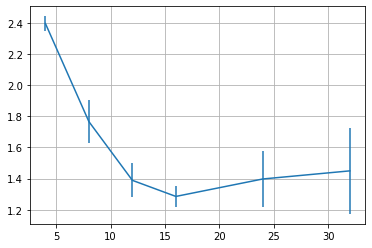

In [12]:
plt.errorbar(batch_sizes_plot, mean_times, std_times)
plt.grid()

In [13]:
batch_sizes_plot

[4, 8, 12, 16, 24, 32]

In [14]:
mean_times

[2.394784688949585,
 1.7655390501022339,
 1.3889185587565105,
 1.285773515701294,
 1.397719383239746,
 1.4496973156929016]

In [15]:
std_times

[0.04652156185274271,
 0.13829496110187897,
 0.10953424927613216,
 0.06479819034664279,
 0.17823463967269282,
 0.276060857757639]